# Compensation

In [28]:
# imports
import os
import xarray

import numpy as np
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns

import pandas
from gsw import conversions, density

# defs

In [96]:
def grab_values(iz, s_profile):
    t0 = ds.CT.data[iz,s_profile]
    s0 = ds.SA.data[iz,s_profile]
    #
    gd = np.isfinite(t0) & np.isfinite(s0)
    lon0 = ds.lon[s_profile]
    #
    return lon0[gd], t0[gd], s0[gd]

In [104]:
def plot_comp(lon, CT, SA, title:str=None):
    plt.clf()
    ax_t = plt.gca()
    
    ax_t.plot(lon, CT)
    
    # Salinity
    ax_s = plt.twinx(ax_t)
    ax_s.plot(lon, SA, 'g')
    
    # Label
    ax_t.set_xlabel('lon (deg)')
    ax_t.set_ylabel('Conservative Temperature (C)', color='b')
    ax_t.tick_params(colors='b', which='major', axis='y')
    
    ax_s.set_ylabel('Absolute Salinity', color='g')
    ax_s.tick_params(colors='g', which='major', axis='y')

    # Title?
    if title is not None:
        ax_t.set_title(title)
    
    plt.show()

# Load

In [2]:
data_path = '/home/xavier/Projects/Oceanography/Spray/CUGN'
datafile = 'CUGN_potential_line_90.nc'
ds = xarray.load_dataset(os.path.join(data_path, datafile))

In [6]:
ds

<xarray.Dataset>
Dimensions:               (profile: 54842, trajectory: 70, depth: 50)
Coordinates:
  * profile               (profile) int32 0 1 2 3 4 ... 54838 54839 54840 54841
    lat                   (profile) float64 33.44 33.44 33.44 ... 32.89 32.88
    lon                   (profile) float64 -117.7 -117.7 ... -117.3 -117.3
    lat_uv                (profile) float64 33.44 33.44 33.44 ... 32.89 32.88
    lon_uv                (profile) float64 -117.7 -117.7 ... -117.3 -117.3
    time                  (profile) datetime64[ns] 2006-10-19T17:51:00 ... 20...
    time_uv               (profile) datetime64[ns] 2006-10-19T17:41:00 ... 20...
  * depth                 (depth) int32 10 20 30 40 50 ... 460 470 480 490 500
Dimensions without coordinates: trajectory
Data variables: (12/16)
    u_depth_mean          (profile) float64 0.03852 -0.01392 ... 0.01629 0.04539
    v_depth_mean          (profile) float64 -0.06798 0.02441 ... 0.03231 0.02128
    mission               (profile) int32 0 0 0 0 0 0 0 ... 69 69 69 69 69 69 69
    mission_profile       (profile) int32 1 2 3 4 5 6 ... 975 976 977 978 979
    trajectory_index      (profile) int32 0 0 0 0 0 0 0 ... 69 69 69 69 69 69 69
    mission_name          (trajectory) |S8 b'06A01301' ... b'22C01301'
    ...                    ...
    v                     (depth, profile) float64 -0.2067 nan nan ... nan nan
    acoustic_backscatter  (depth, profile) float64 71.58 nan nan ... nan nan nan
    doxy                  (depth, profile) float64 nan nan nan ... nan nan nan
    CT                    (depth, profile) float64 17.76 17.97 17.88 ... nan nan
    sigma0                (depth, profile) float64 24.07 24.03 24.05 ... nan nan
    SA                    (depth, profile) float64 33.49 33.5 33.51 ... nan nan
Attributes: (12/50)
    id:                              CUGN_line_90
    date_created:                    2023-08-02T08:43:43Z
    time_coverage_start:             2006-10-19T17:41:00Z
    time_coverage_end:               2023-03-20T15:42:26Z
    geospatial_bounds_crs:           EPSG:4326
    geospatial_bounds:               POLYGON ((-121.0906975 21.58784, -121.09...
    ...                              ...
    platform_institution:            Scripps Institution of Oceanography
    sea_name:                        Coastal Waters of California
    summary:                         The overarching goal of the California U...
    references:                      Rudnick, D. L. (2016). Ocean research en...
    title:                           California Underwater Glider Network - L...
    site:                            CUGN Line 90

In [32]:
lat = np.nanmedian(ds.lat.data)
lon = np.nanmedian(ds.lon.data)
lat, lon

(32.619445, -119.71646750000001)

# Find a track

In [9]:
dlon = ds.lon - np.roll(ds.lon,1)

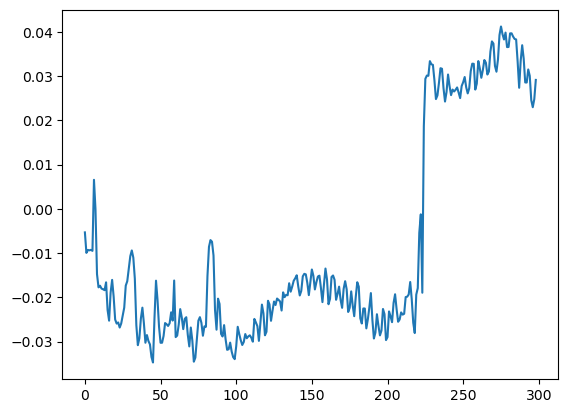

In [14]:
plt.clf()
ax = plt.gca()
#ax.plot(ds.lon[0:1000])
ax.plot(dlon[1:300])
plt.show()

# Turn around point

In [16]:
turn = dlon.data*np.roll(dlon.data,-1) < 0
np.where(turn)

(array([    6,     7,   224, ..., 54834, 54835, 54841]),)

# Plot a track at depth=50

In [92]:
turn0 = np.s_[:iturn]

In [97]:
iz = 5
lon50, t50, s50 = grab_values(iz, turn0)

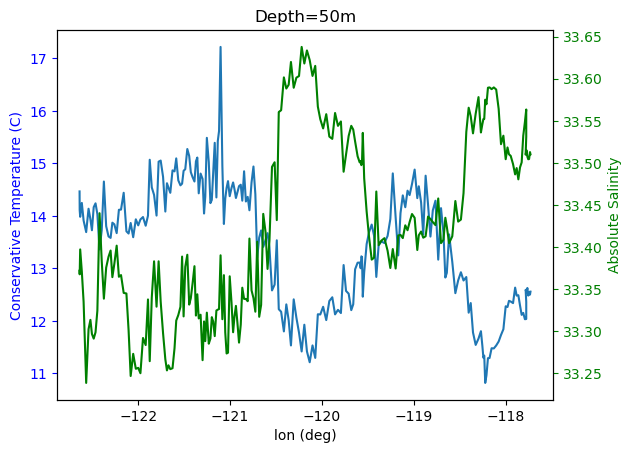

In [98]:
plot_comp(lon50, t50, s50, title='Depth=50m')

# 200m

In [99]:
iz = 20
lon200, t200, s200 = grab_values(iz, turn0)

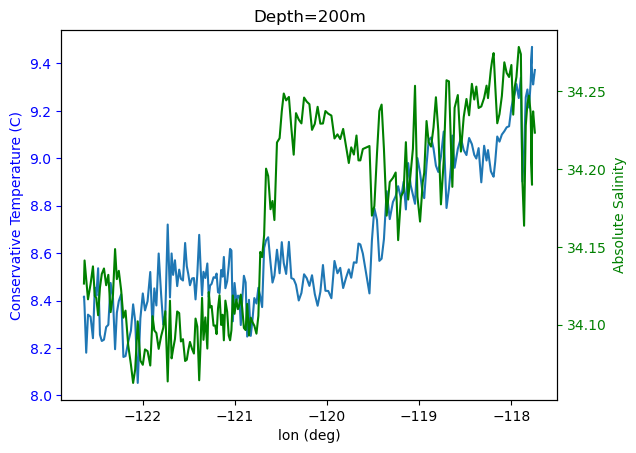

In [105]:
plot_comp(lon200, t200, s200, title='Depth=200m')